## Package import

In [1]:
from regmonkey_style import stylewizard as sw

## Scatter-plot

### Plotly-express

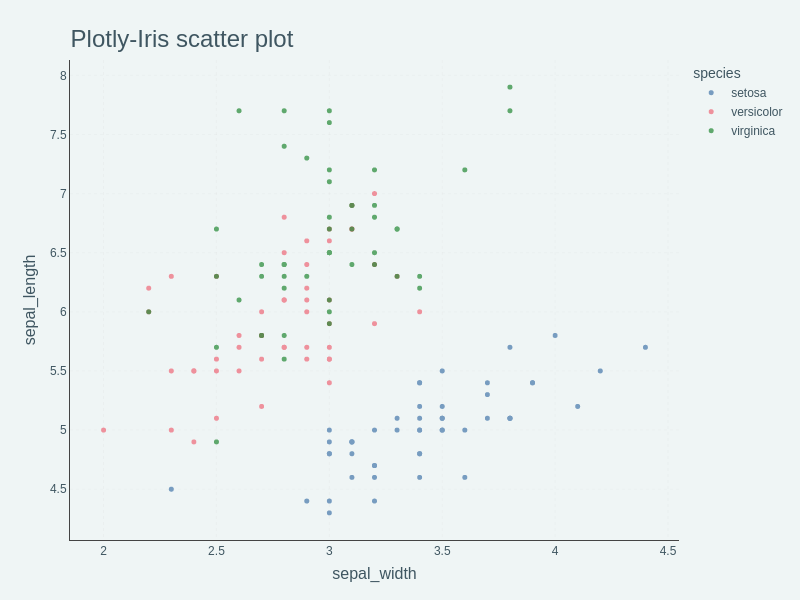

In [2]:
import plotly.express as px
from IPython.display import Image, display

# set format
sw.set_templates("regmonkey_scatter")
# create scatter via plotly
df = px.data.iris()
fig = px.scatter(
    df,
    x="sepal_width",
    y="sepal_length",
    color="species",
    title="Plotly-Iris scatter plot",
    width=800,
    height=600,
)

# output path
output_path_iris = "./output/regmonkey_scatter_plotly_iris.png"
fig.write_image(output_path_iris, engine="kaleido")
display(Image(filename=output_path_iris))

If you want to revert to the default settings, just run `sw.restore_default()`.

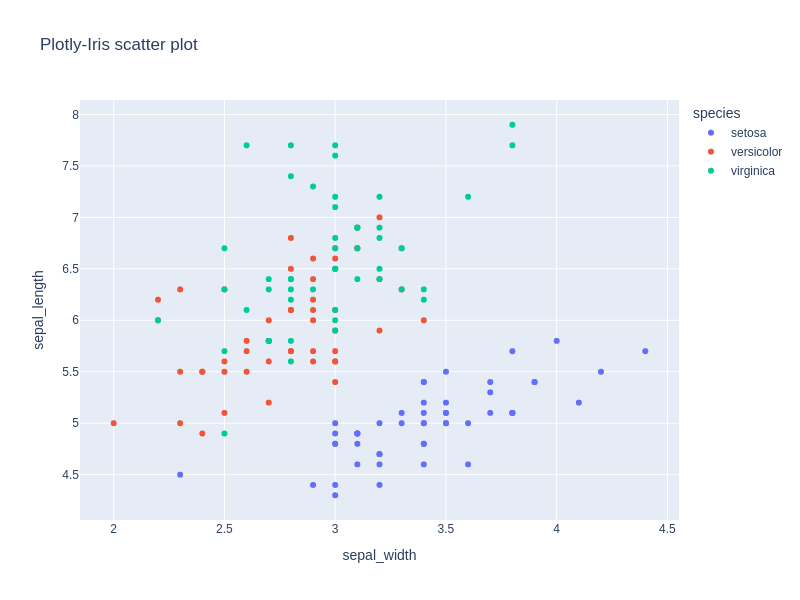

In [3]:
# set format
sw.restore_default()

fig = px.scatter(
    df,
    x="sepal_width",
    y="sepal_length",
    color="species",
    title="Plotly-Iris scatter plot",
    width=800,
    height=600,
)

# output path
output_path_iris = "./output/regmonkey_scatter_plotly_iris_default.png"
fig.write_image(output_path_iris, engine="kaleido")
display(Image(filename=output_path_iris))

### plotly.graph_objects

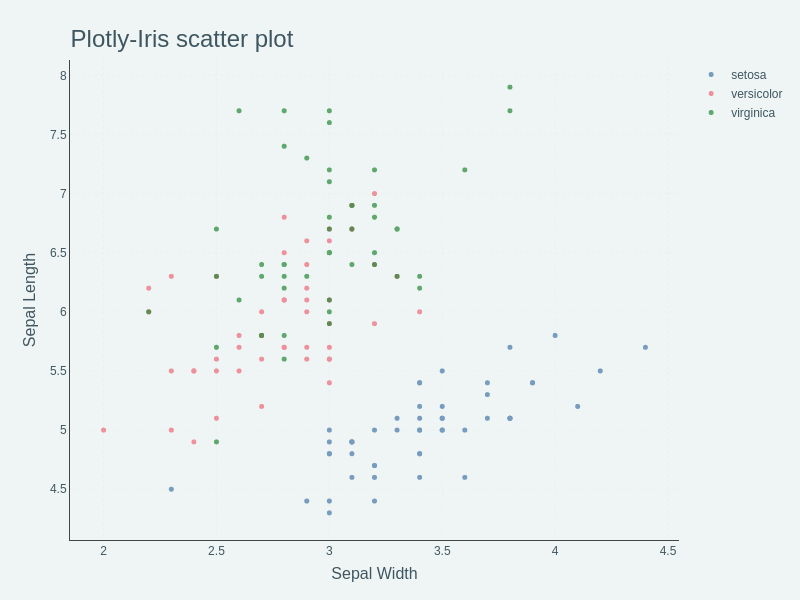

In [4]:
import plotly.graph_objects as go

sw.set_templates("regmonkey_scatter")

# create scatter via plotly
fig = go.Figure()

species = df["species"].unique()
for sp in species:
    species_data = df[df["species"] == sp]
    fig.add_trace(
        go.Scatter(
            x=species_data["sepal_width"],
            y=species_data["sepal_length"],
            mode="markers",
            name=sp,
        )
    )

# Update layout
fig.update_layout(
    title="Plotly-Iris scatter plot",
    xaxis_title="Sepal Width",
    yaxis_title="Sepal Length",
    width=800,
    height=600,
)

# output path
output_path_iris = "./output/regmonkey_scatter_plotly_iris_by_graph_objects.png"
fig.write_image(output_path_iris, engine="kaleido")
display(Image(filename=output_path_iris))

### matplotlib

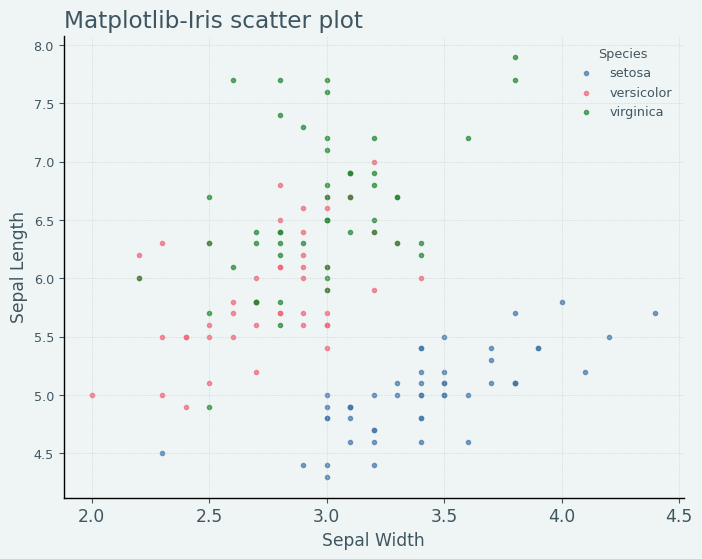

In [5]:
import matplotlib.pyplot as plt

# Create a scatter plot using matplotlib
plt.figure(figsize=(8, 6))

# Plot each species with a different color
species = df["species"].unique()

for sp in species:
    species_data = df[df["species"] == sp]
    plt.scatter(species_data["sepal_width"], species_data["sepal_length"], label=sp)

plt.title("Matplotlib-Iris scatter plot")
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.legend(title="Species")

# output path
output_path_iris = "./output/regmonkey_scatter_matplotlib_iris.png"
plt.savefig(output_path_iris)

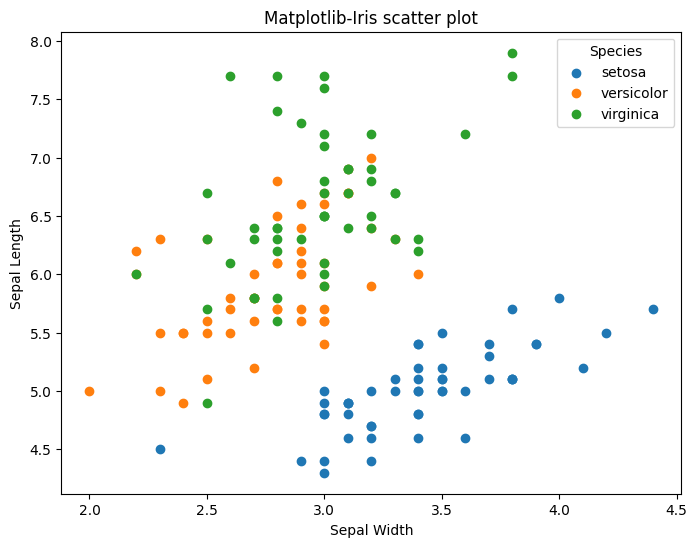

In [6]:
sw.restore_default()

# Create a scatter plot using matplotlib
plt.figure(figsize=(8, 6))

# Plot each species with a different color
species = df["species"].unique()

for sp in species:
    species_data = df[df["species"] == sp]
    plt.scatter(species_data["sepal_width"], species_data["sepal_length"], label=sp)

plt.title("Matplotlib-Iris scatter plot")
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.legend(title="Species")

# output path
output_path_iris = "./output/regmonkey_scatter_matplotlib_iris_default.png"
plt.savefig(output_path_iris)

### Seaborn

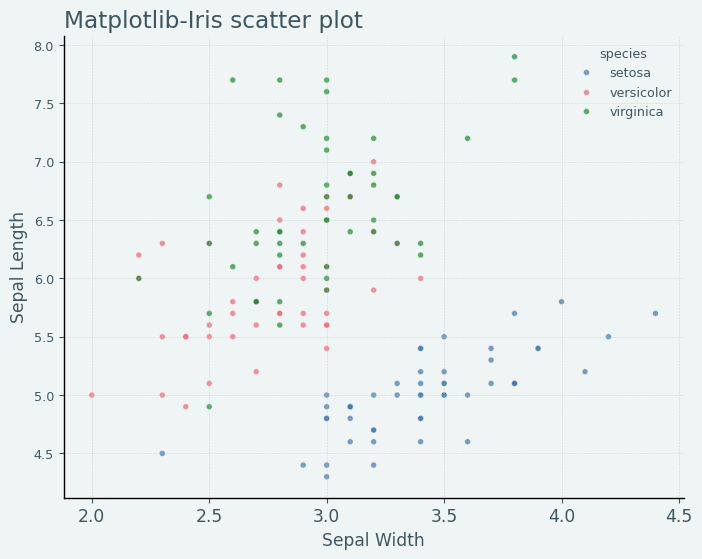

In [7]:
import seaborn as sns

sw.set_templates("regmonkey_scatter")

# Create a scatter plot using Matplotlib
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="sepal_width",
    y="sepal_length",
    hue="species",
    s=sw.CONFIG.scatter.markersize.matplotlib * 6,
    alpha=sw.CONFIG.scatter.opacity,
)
plt.title("Matplotlib-Iris scatter plot")
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")

# output path
output_path_iris = "./output/regmonkey_scatter_matplotlib_iris_by_seaborn.png"
plt.savefig(output_path_iris)

### matplotlib + pandas

- Note that the marker size is set using the rcParams from the template configuration.
- figure plot created by pandas.DataFrame method does not reflect the markersize configuration


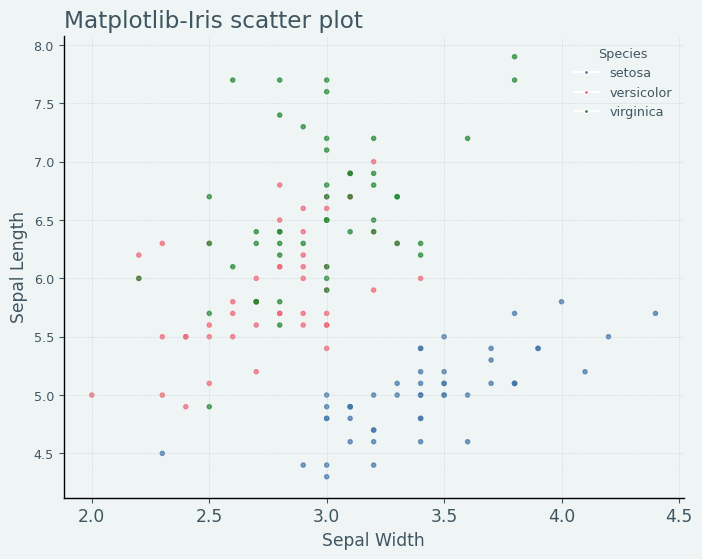

In [8]:
sw.set_templates("regmonkey_scatter")

# Extract colors from sw.CONFIG.color_style.qualitative_scatter_color
colors = sw.CONFIG.color_style.qualitative_scatter_color
alpha = sw.CONFIG.scatter.opacity

# Map species to colors
species = df["species"].unique()
color_map = {species[i]: colors[i % len(colors)] for i in range(len(species))}
df["color"] = df["species"].map(color_map)


# Create a scatter plot using df.plot
fig, ax = plt.subplots(figsize=(8, 6))

df.plot(
    kind="scatter",
    x="sepal_width",
    y="sepal_length",
    c=df["color"],
    s=sw.CONFIG.scatter.markersize.matplotlib * 3,
    title="Matplotlib-Iris scatter plot",
    ax=ax,
    alpha=alpha,
)

# Set plot attributes
ax.set_xlabel("Sepal Width")
ax.set_ylabel("Sepal Length")

# Create custom legend
handles = [
    plt.Line2D([0], [0], marker="o", color="w", markerfacecolor=color_map[sp], label=sp)
    for sp in species
]
legend = ax.legend(
    handles=handles, title="Species", facecolor=sw.CONFIG.color_style.background_color
)

plt.show()

## Subplots

In [9]:
import numpy as np

# example data
x = np.arange(0.1, 4, 0.1)
y1 = np.exp(-1.0 * x)
y2 = np.exp(-0.5 * x)

# example variable error bar values
y1err = 0.1 + 0.1 * np.sqrt(x)
y2err = 0.1 + 0.1 * np.sqrt(x/2)


fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(12, 6))

ax0.set_title('all errorbars')
ax0.errorbar(x, y1, yerr=y1err)
ax0.errorbar(x, y2, yerr=y2err)

ax1.set_title('only every 6th errorbar')
ax1.errorbar(x, y1, yerr=y1err, errorevery=6)
ax1.errorbar(x, y2, yerr=y2err, errorevery=6)

ax2.set_title('second series shifted by 3')
ax2.errorbar(x, y1, yerr=y1err, errorevery=(0, 6))
ax2.errorbar(x, y2, yerr=y2err, errorevery=(3, 6))

fig.suptitle('Errorbar subsampling')
plt.show()